# Introducción a Probabilidad y Estadística

## Generalidades

In [ ]:
# Módulos necesarios
import matplotlib.pyplot as plt
import random

random.seed(123) # Semilla inicial para garantizar repetibilidad

%matplotlib inline

### Obtención de aleatorios en diversos contextos

In [ ]:
# randint() devuelve un número entero comprendido entre los valores indicados.

# Ejemplo:
for i in range(6):
    print(random.randint(0, 1))

0
0
1
1
1
0


In [ ]:
list(range(1,9,2))

[1, 3, 5, 7]

In [ ]:
# randrange() devuelve números enteros comprendidos entre un valor inicial y otro final, separados por un valor «paso» determinado.

# Ejemplo:
for i in range(10):
    print(random.randrange(1, 9, 2)) # Solamente impares entre 1 y 9 inclusive

3
3
5
5
3
3
1
7
1
7


In [ ]:
# choice() y choices(), permiten seleccionar valores de una lista de forma aleatoria.
# Toman una lista como argumento y seleccionan aleatoriamente un valor (o valores, caso de choices()).
# También, se puede aplicar una matriz con pesos para modificar la distribución de la variable aleatoria.

objetos = ["perro", "gato"]

for i in range(5):
    print(random.choice(objetos))

perro
perro
gato
gato
perro


In [ ]:
for i in range(5):
    print(random.choices(objetos, weights=[2, 1], k=4))  # Le damos un peso de 2 los perros frente a 1 para los gatos. k define cuántos elegimos.

['gato', 'perro', 'perro', 'gato']
['perro', 'gato', 'perro', 'perro']
['gato', 'gato', 'perro', 'gato']
['perro', 'perro', 'perro', 'gato']
['perro', 'perro', 'gato', 'perro']


In [ ]:
# shuffle() «baraja» una lista. Esta función ‘mezcla’ o cambia aleatoriamente el orden de los elementos de una lista antes de seleccionar uno de ellos.

objetos = ["perro", "gato", "liebre", "pájaro"]

for i in range(5):
    random.shuffle(objetos)
    print(objetos)

['perro', 'gato', 'liebre', 'pájaro']
['gato', 'perro', 'pájaro', 'liebre']
['liebre', 'gato', 'pájaro', 'perro']
['liebre', 'gato', 'pájaro', 'perro']
['liebre', 'pájaro', 'perro', 'gato']


In [ ]:
# uniform() devuelve flotantes distribuidos uniformemente. Para más ver: uniform(), triangular(), normalvariate(), etc.

# Ejemplo:
for i in range(5):
    print(random.uniform(0, 1))

0.9136459118642296
0.6580741574010793
0.17012688767090822
0.33691615279170617
0.39119330707130273


In [ ]:
# gauss() genera un conjunto de números aleatorios cuya distribución de probabilidad es una distribución normal.

# Ejemplo:
for i in range(5):
    print(random.gauss(0, 1))   # Los parámetros son mu y sigma respectivamente.

0.9896533047583664
0.49093838900167924
-0.811154670043986
-0.4016141955243131
0.16050640967816085


### Gráficas

In [ ]:
# Ejemplo simplemente, abajo lo mismo con compresión de listas
# Compresión de listas es más eficiente en la realización de estas operaciones
lista = []
for i in range(1000):
  lista.append(random.gauss(0, 1))

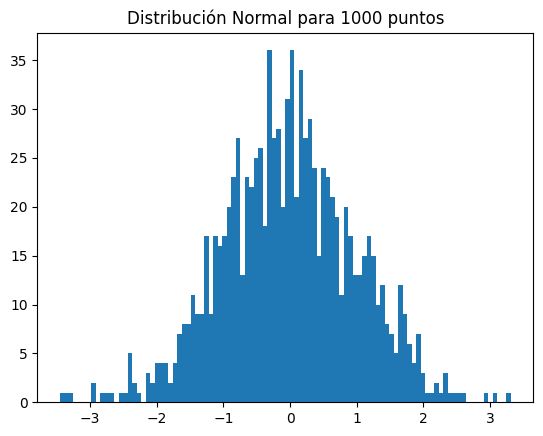

In [ ]:
# Aleatorios con distribución NORMAL

campana = [random.gauss(0, 1) for i in range(1000)] # Comprensión de listas... Se obtiene la misma lista que arriba. Óptimización de código
plt.hist(campana, bins=100)      # Gráfica de histograma
plt.title("Distribución Normal para 1000 puntos")
plt.show()

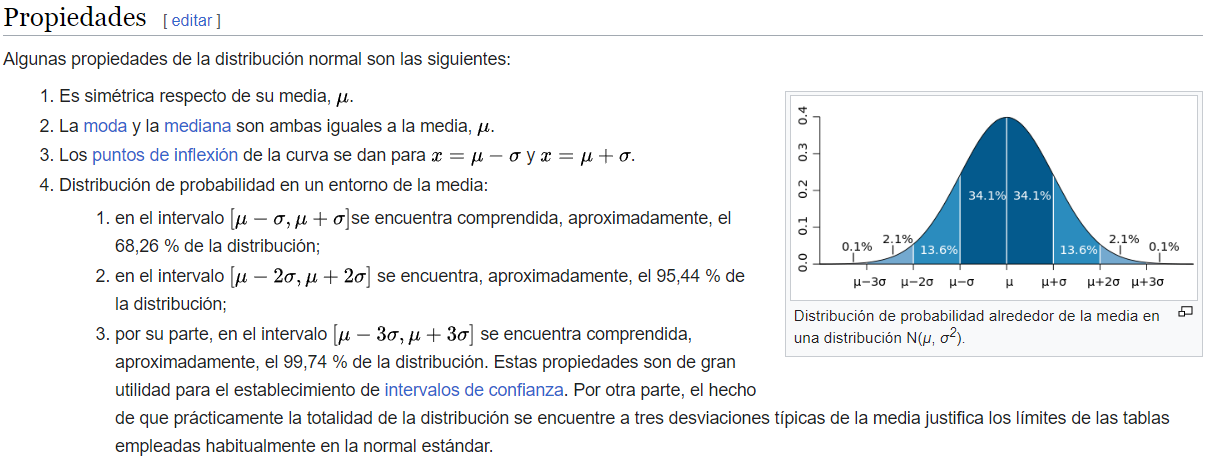

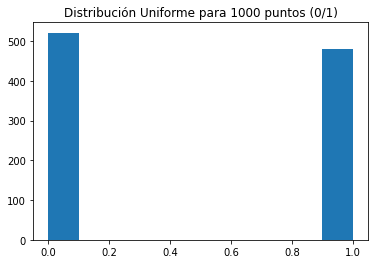

In [ ]:
# Aleatorios enteros con distribución UNIFORME

enteros = [random.randint(0, 1) for i in range(1000)] # Comprensión de listas...
plt.hist(enteros)      # Gráfica de histograma
plt.title("Distribución Uniforme para 1000 puntos (0/1)")
plt.show()

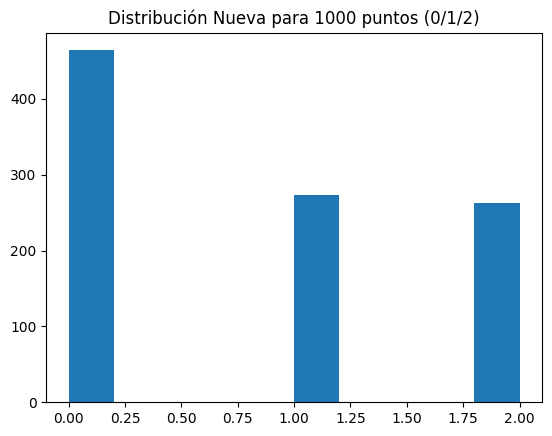

In [ ]:
# Aleatorios enteros con distribución cambiada por pesos

opciones = [0, 1, 2]

dist_nueva = [random.choices(opciones, weights=[2, 1, 1], k=1)[0] for i in range(1000)] # Comprensión de listas...
plt.hist(dist_nueva)      # Gráfica de histograma
plt.title("Distribución Nueva para 1000 puntos (0/1/2)")
plt.show()

## Ejemplos Aplicados

### Moneda

In [ ]:
# Ejemplo: ley de grandes números
# Si se arroja una moneda correctamente balanceada, la probabilidad de cara o cruz es 1/2.

medias = []
tiradas = []

for cantidad in range(1, 1000, 20):    # Comenzamos tirando una sola vez la moneda, hasta un total de 999 tiradas. Avanzamos de a 20.
    resultados = [random.randint(0, 1) for i in range(cantidad)]    # O para cara y 1 para cruz, por ejemplo. Se pueden codificar las cosas.

    # Guardamos resultados para analizar después
    tiradas.append(cantidad)
    medias.append(sum(resultados)/cantidad)

Text(0, 0.5, 'Probabilidad')

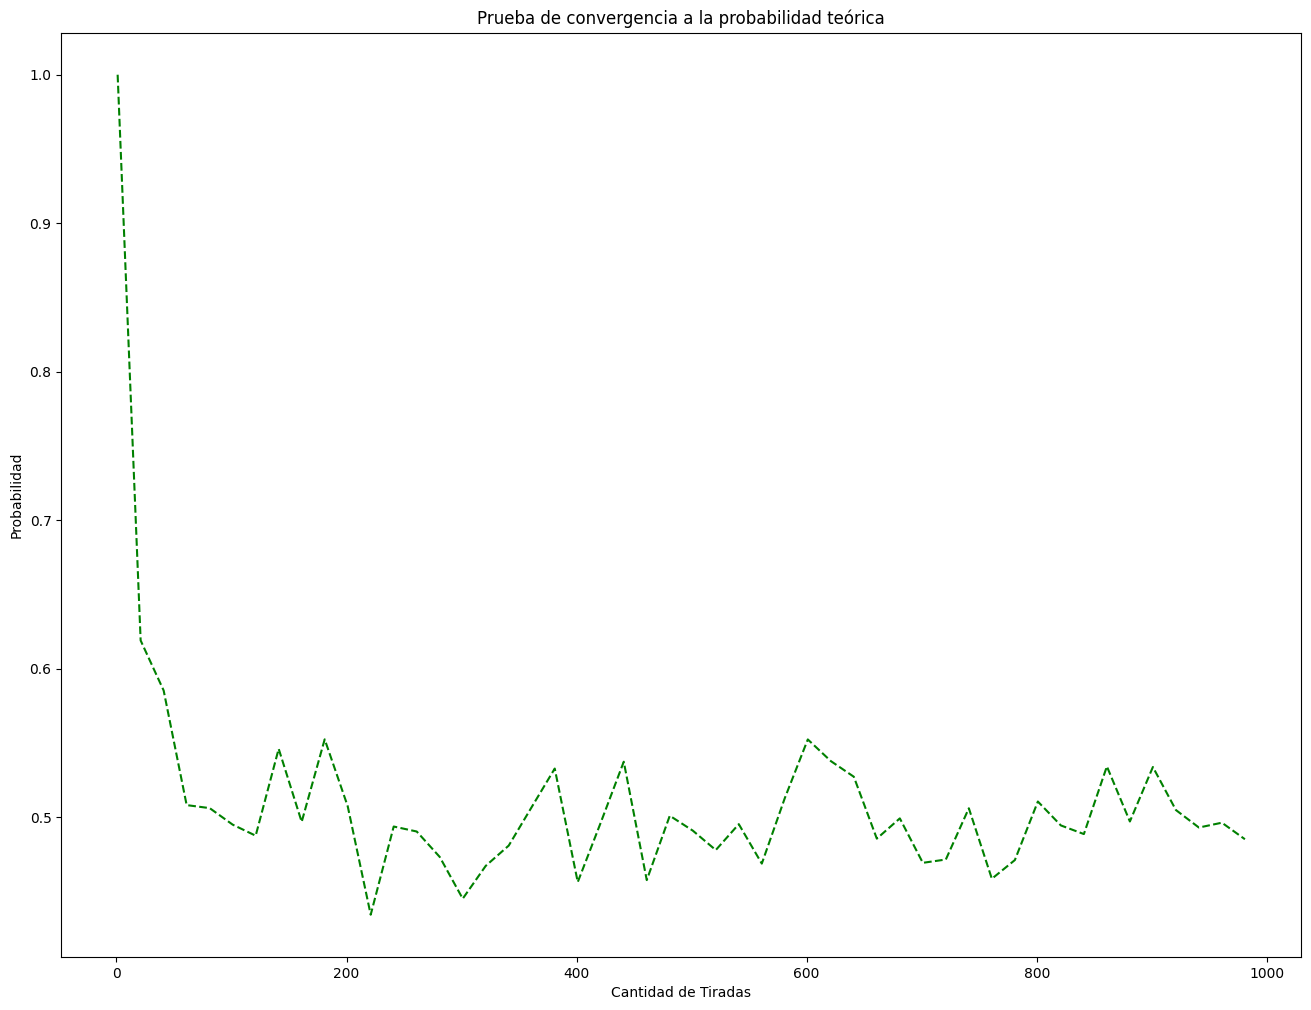

In [ ]:
plt.rcParams["figure.figsize"] = (16,12) # Tamaño diferente para la figura
plt.plot(tiradas, medias, 'g--')  # Estilo punteado para la línea
plt.title("Prueba de convergencia a la probabilidad teórica")
plt.xlabel("Cantidad de Tiradas")
plt.ylabel("Probabilidad")

### Moneda Trucada

Caso hipótetico en el que asumimos que un lado es "más pesado".

In [ ]:
medias = []
tiradas = []

for cantidad in range(1, 1000, 20):    # Comenzamos tirando una sola vez la moneda, hasta un total de 999 tiradas. Avanzamos de a 20.
    resultados = [random.choices([0, 1], weights=[0.7, 1], k=1)[0] for i in range(cantidad)]    # Pesos arbitrarios, como para simular que una cara es ligeramente "más pesada"

    # Guardamos resultados para analizar después
    tiradas.append(cantidad)
    medias.append(sum(resultados)/cantidad)

Text(0.5, 0, 'Probabilidad')

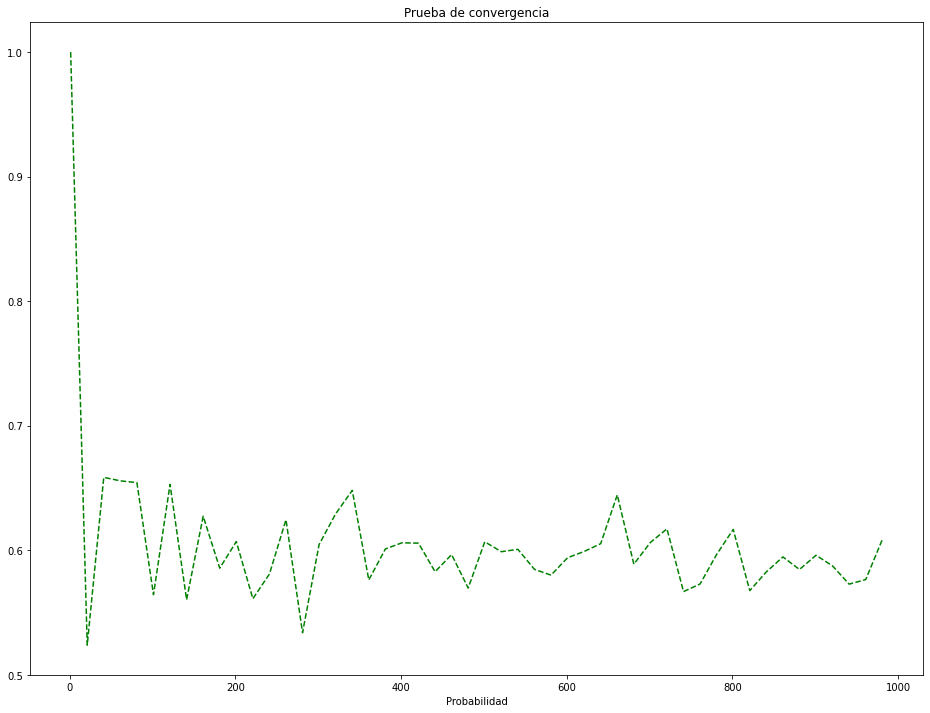

In [ ]:
plt.rcParams["figure.figsize"] = (16,12) # Tamaño diferente para la figura
plt.plot(tiradas, medias, 'g--')  # Estilo punteado para la línea
plt.title("Prueba de convergencia")
plt.xlabel("Cantidad de Tiradas")
plt.xlabel("Probabilidad")

# Ahora la media no es 0.5, hay un caso que es más favorable. Muestreando el comporamiento real de una variable, se puede aproximar su distribución y usarla en simulaciones.

### Cartas

In [ ]:
# Generamos las cartas de la baraja usada en el Truco
numeros = [i for i in range(1, 13)]
numeros.remove(8)   # 8 no se usa para el Truco
numeros.remove(9)   # 9 tampoco
palos = ["Espada", "Oro", "Basto", "Copa"]

baraja = []
for num in numeros:
    for pal in palos:
        baraja.append("{} de {}".format(num, pal))

In [ ]:
len(baraja)     # Verificamos cantidad

40

In [ ]:
print(baraja)   # Verificamos contenido

['1 de Espada', '1 de Oro', '1 de Basto', '1 de Copa', '2 de Espada', '2 de Oro', '2 de Basto', '2 de Copa', '3 de Espada', '3 de Oro', '3 de Basto', '3 de Copa', '4 de Espada', '4 de Oro', '4 de Basto', '4 de Copa', '5 de Espada', '5 de Oro', '5 de Basto', '5 de Copa', '6 de Espada', '6 de Oro', '6 de Basto', '6 de Copa', '7 de Espada', '7 de Oro', '7 de Basto', '7 de Copa', '10 de Espada', '10 de Oro', '10 de Basto', '10 de Copa', '11 de Espada', '11 de Oro', '11 de Basto', '11 de Copa', '12 de Espada', '12 de Oro', '12 de Basto', '12 de Copa']


In [ ]:
random.choices(baraja, k=3)

['12 de Basto', '12 de Oro', '6 de Basto']

In [ ]:
probabilidad_interes = []
rondas_repartidas = []

for cantidad in range(1, 10000, 20):
    resultados = [random.choices(baraja, k=3) for i in range(cantidad)]

    # Guardamos resultados para analizar después
    rondas_repartidas.append(cantidad)

    # Miramos en las barajas resultantes cuántas contienen lo que buscamos
    conteo = 0
    for mano in resultados:
        if '1 de Espada' in mano:
            conteo += 1
    probabilidad_interes.append(conteo/cantidad)

Text(0, 0.5, 'Probabilidad Resultante')

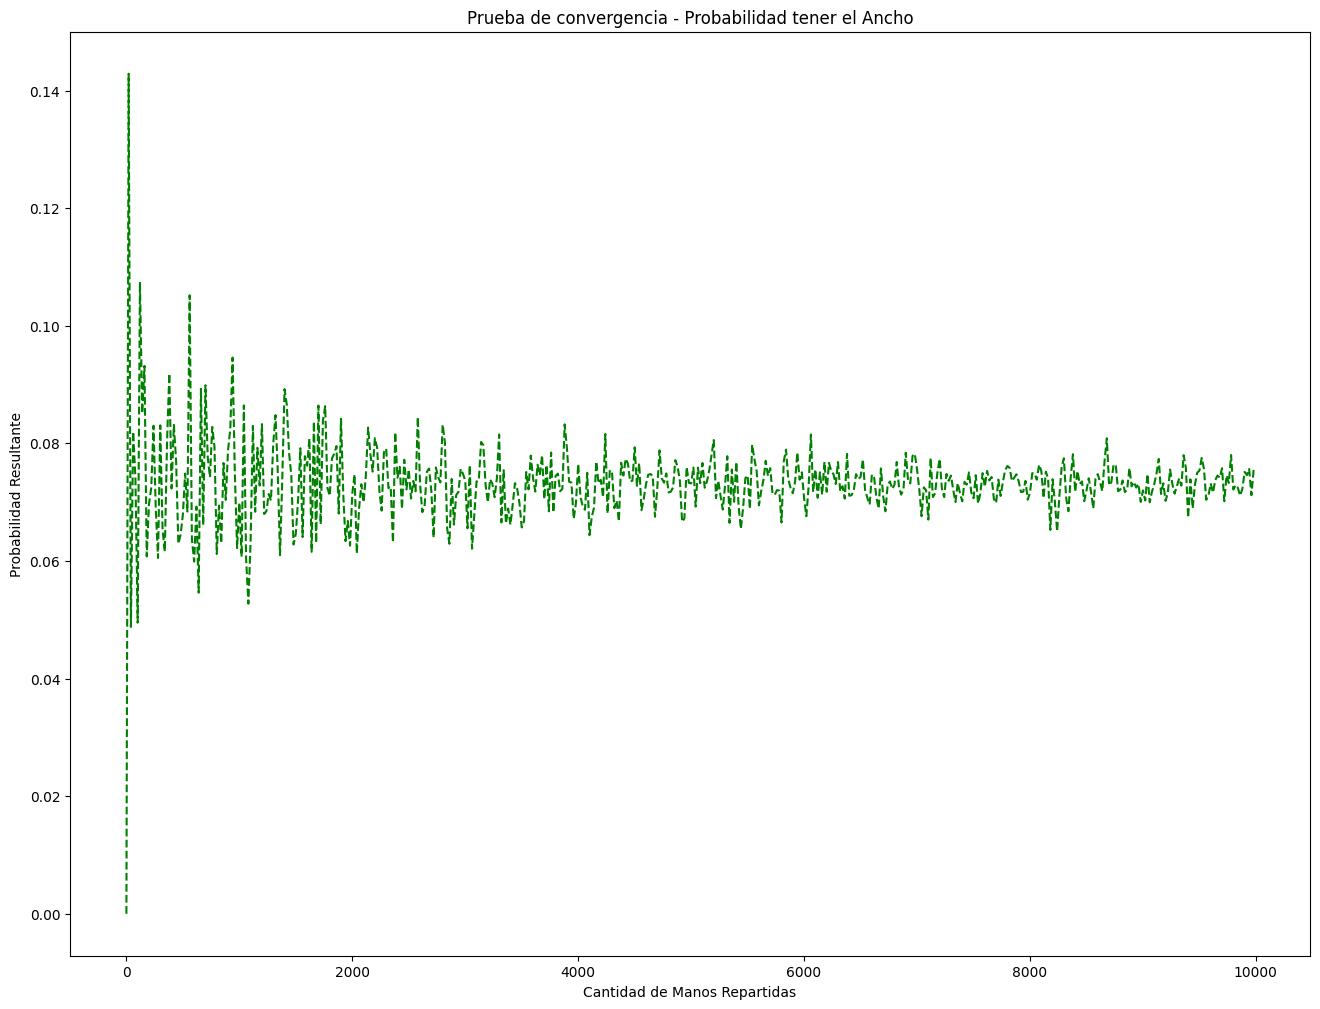

In [ ]:
plt.rcParams["figure.figsize"] = (16,12) # Tamaño diferente para la figura
plt.plot(rondas_repartidas, probabilidad_interes, 'g--')  # Estilo punteado para la línea
plt.title("Prueba de convergencia - Probabilidad tener el Ancho")
plt.xlabel("Cantidad de Manos Repartidas")
plt.ylabel("Probabilidad Resultante")

**Contraste Teórico:**

Posibles manos de 3 cartas:

                            (40x39x38)/(2x3) = 9880   ó   C(40,3)

Probabilidad de 1 carta específica:

                            C(39,2)/C(40,3) = 741/9880 = 0.075

## Muestreo

Supongamos que tenemos una población determinada y alguna de sus características presenta la siguiente distribución

In [ ]:
import numpy as np
# Numeric Python -> NumPy. Biblioteca que da soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas
# Muestro cosas parecidas a las de arriba, sólo que con esta librería. Optimiza y se nota, al trabajar con "grande" vectores y matrices.

dimension_poblacion = 10000
media = 50
desviacion_std = 10

poblacion = np.random.normal(media, desviacion_std, dimension_poblacion)

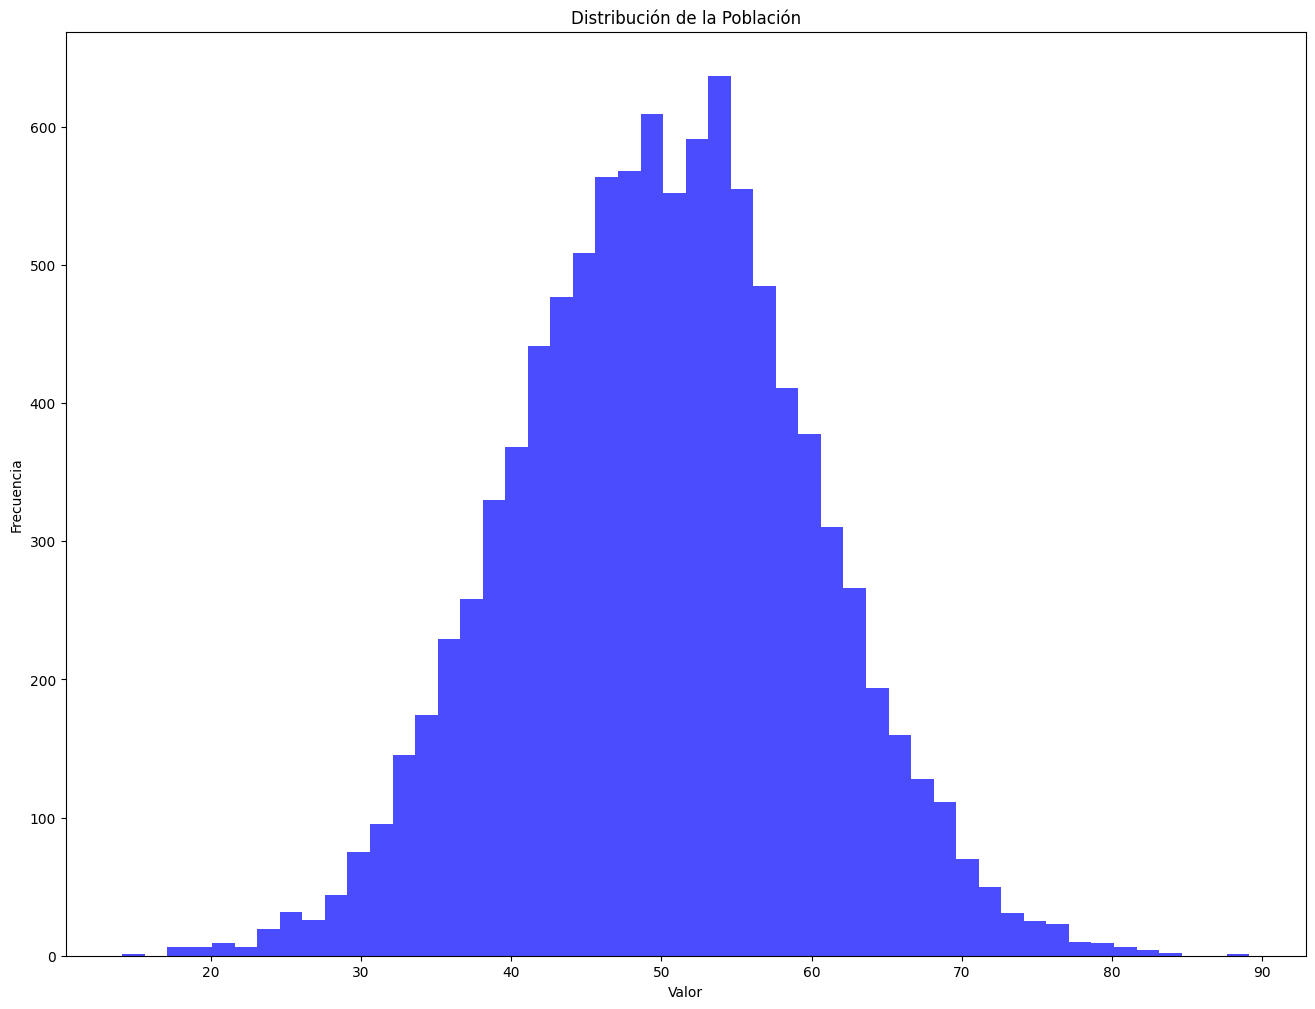

In [ ]:
plt.hist(poblacion, bins=50, color='blue', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Población')
plt.show()

### Muestreo incorrecto

Ahora, vamos a simular un muestreo incorrecto al tomar una muestra pequeña de la población. Esto ayudará a ilustrar cómo el tamaño de la muestra puede afectar la representación de la población.

In [ ]:
muestra_chica = 100
muestreo_incorrecto = np.random.choice(poblacion, size=muestra_chica, replace=False)

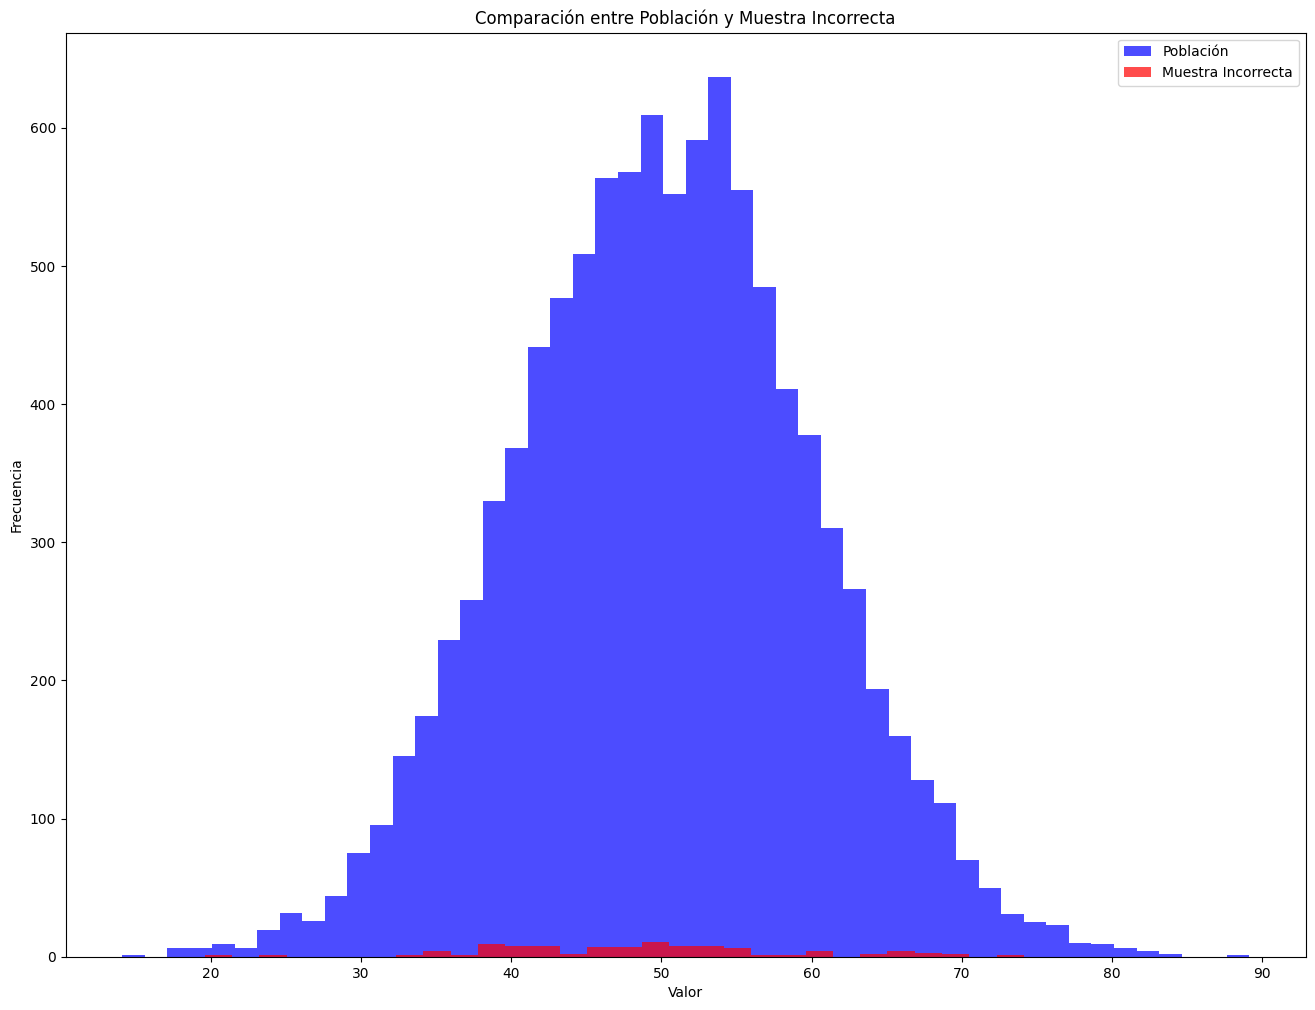

In [ ]:
plt.hist(poblacion, bins=50, color='blue', alpha=0.7, label='Población')
plt.hist(muestreo_incorrecto, bins=30, color='red', alpha=0.7, label='Muestra Incorrecta')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Comparación entre Población y Muestra Incorrecta')
plt.legend()
plt.show()

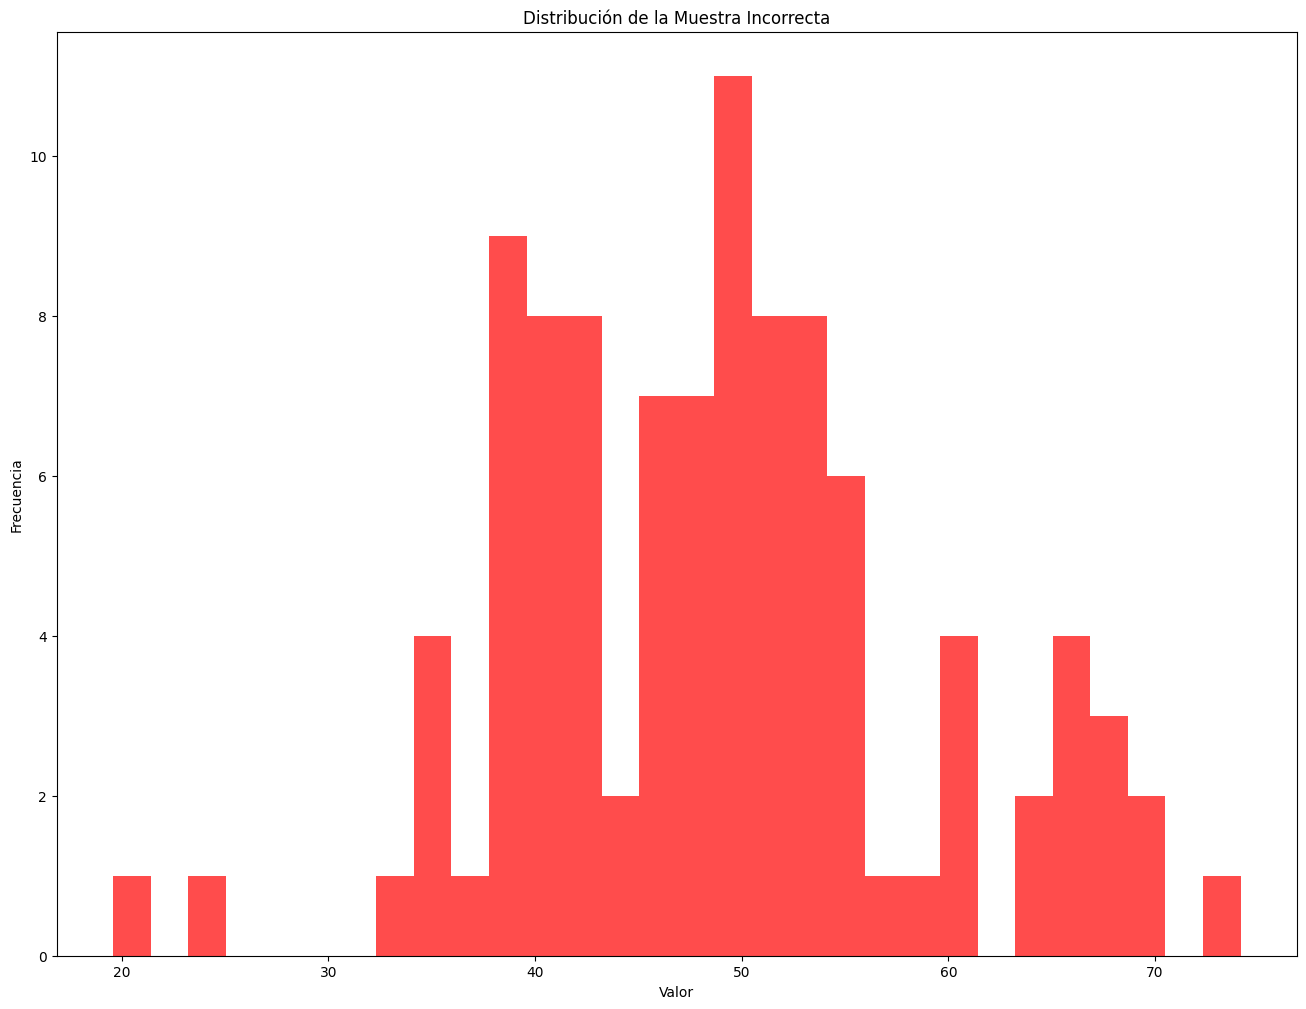

In [ ]:
plt.hist(muestreo_incorrecto, bins=30, color='red', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Muestra Incorrecta')
plt.show()

### Muestreo correcto

In [ ]:
muestra_grande = 1000
muestreo_correcto = np.random.choice(poblacion, size=muestra_grande, replace=False)

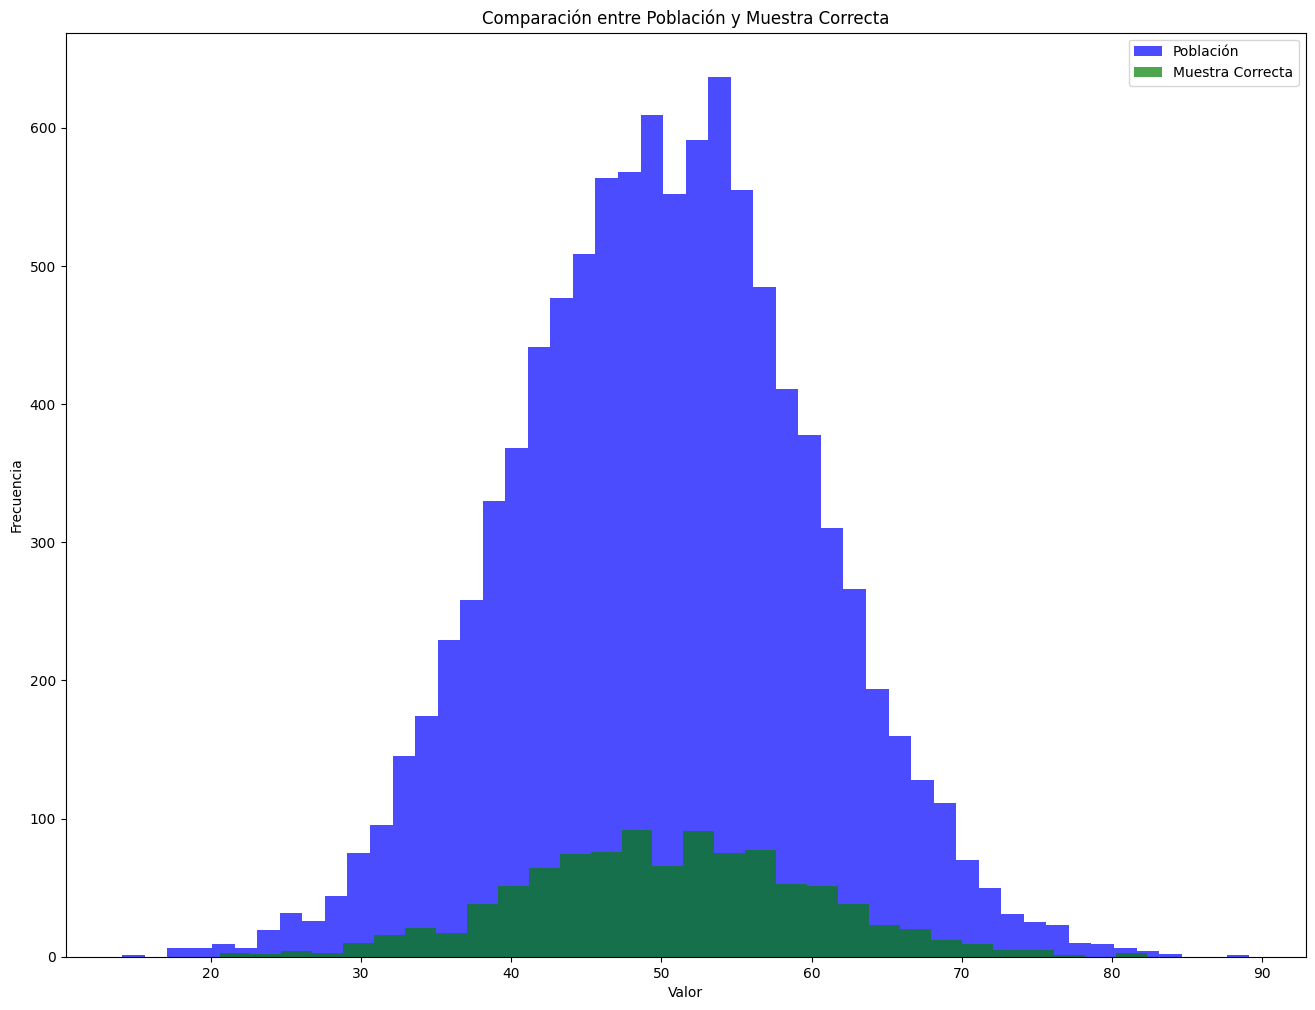

In [ ]:
plt.hist(poblacion, bins=50, color='blue', alpha=0.7, label='Población')
plt.hist(muestreo_correcto, bins=30, color='green', alpha=0.7, label='Muestra Correcta')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Comparación entre Población y Muestra Correcta')
plt.legend()
plt.show()

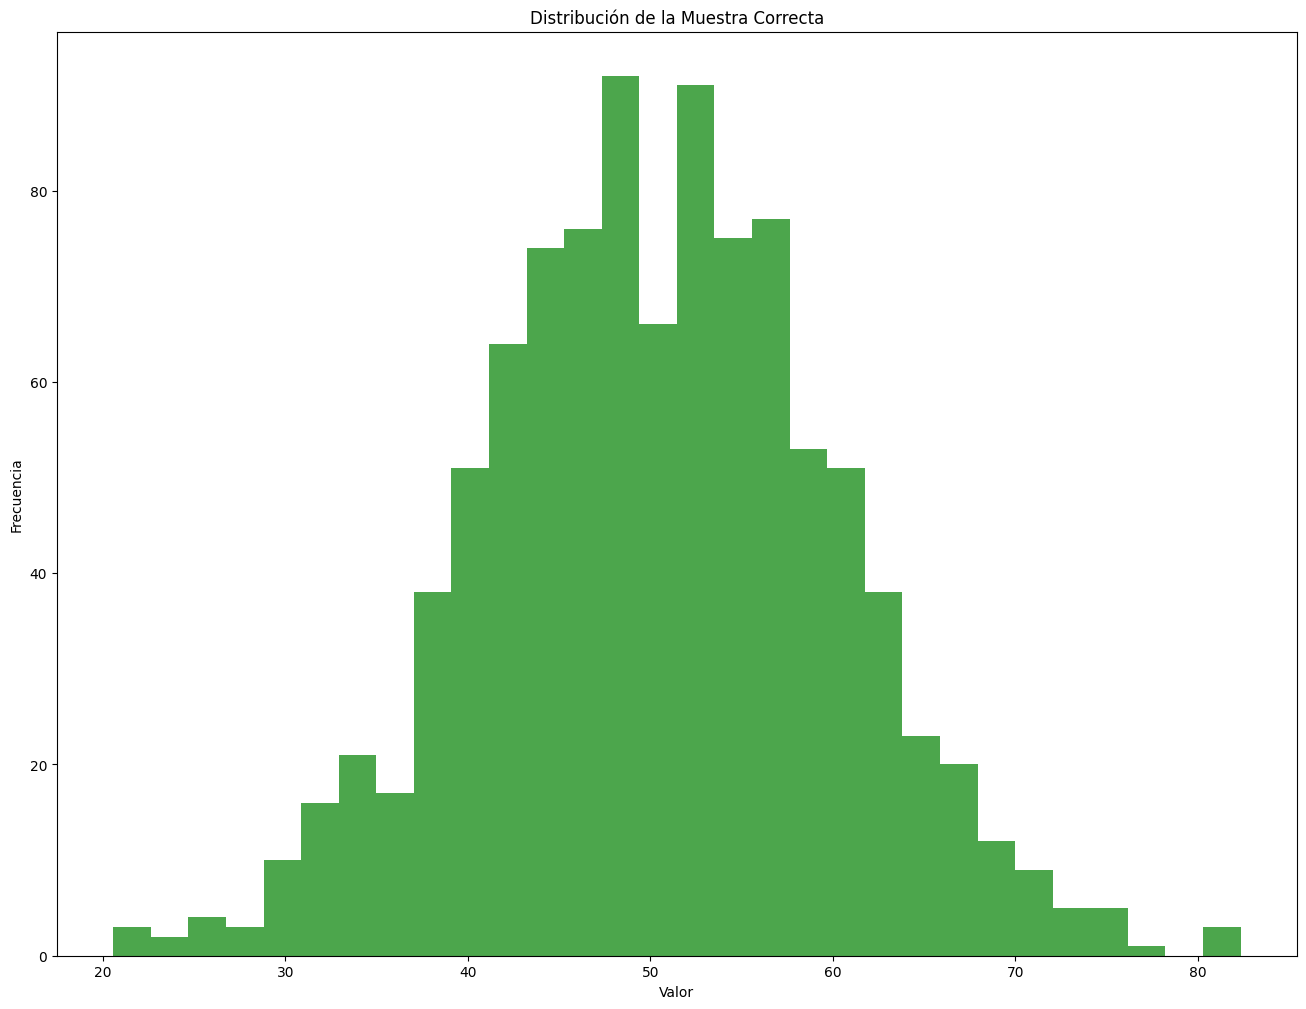

In [ ]:
plt.hist(muestreo_correcto, bins=30, color='green', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Muestra Correcta')
plt.show()

### Ejemplo sin aleatorio

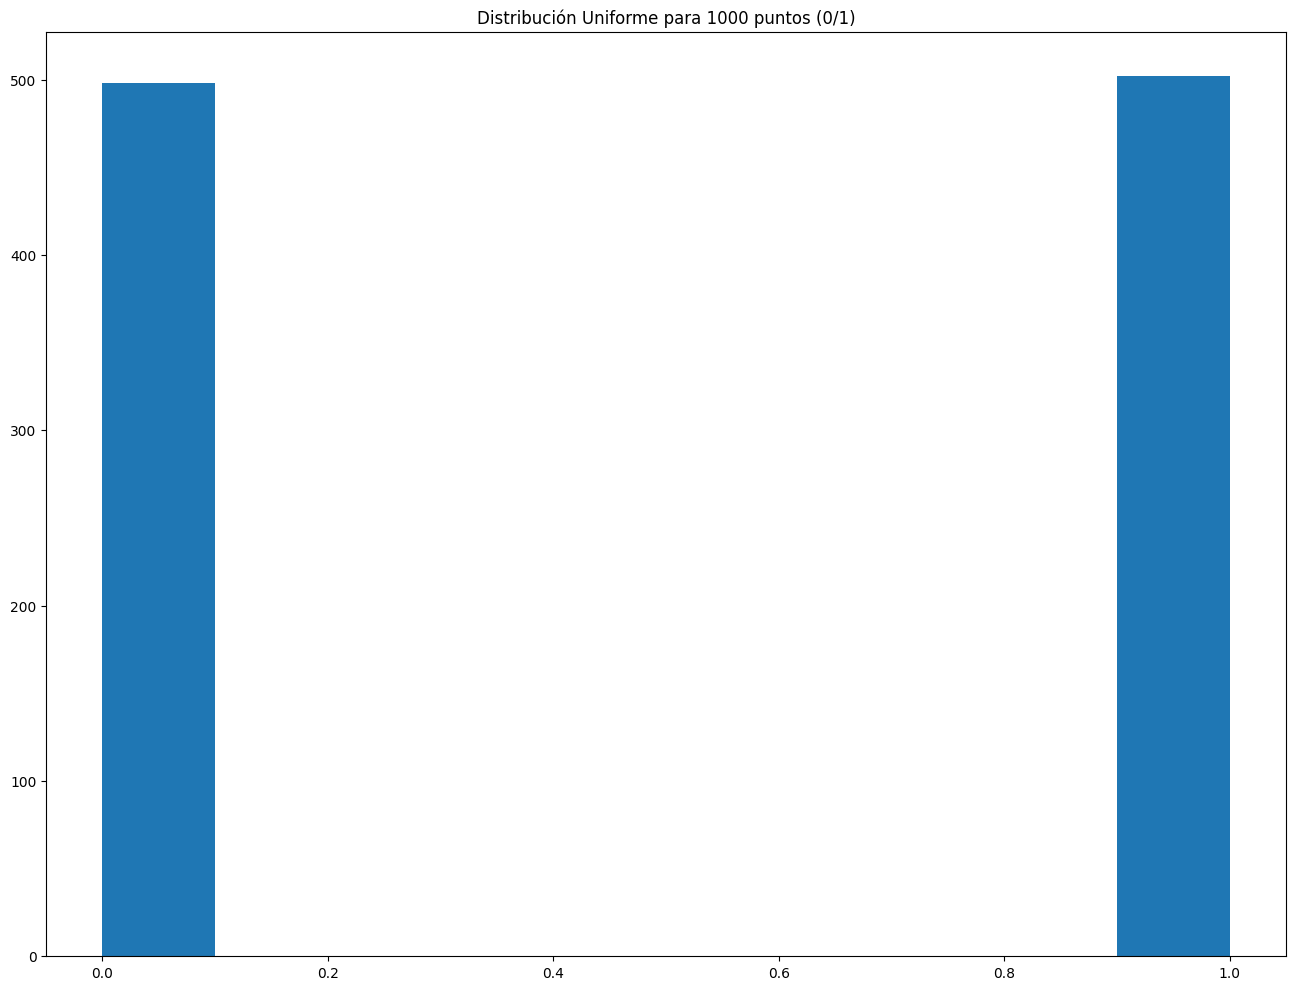

In [ ]:
poblacion_uni = [random.randint(0, 1) for i in range(1000)] # Comprensión de listas...
plt.hist(poblacion_uni)      # Gráfica de histograma
plt.title("Distribución Uniforme para 1000 puntos (0/1)")
plt.show()

In [ ]:
poblacion_uni.sort()  # Ordeno los datos, la naturaleza de la población no cambia

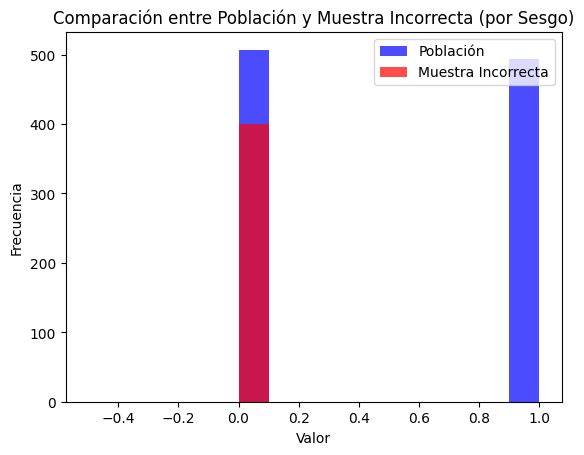

In [ ]:
muestra_grande = 400
muestreo_incorrecto = poblacion_uni[:muestra_grande] # En lugar de elegir al azar, tomo los primeros

plt.hist(poblacion_uni, color='blue', alpha=0.7, label='Población')
plt.hist(muestreo_incorrecto, color='red', alpha=0.7, label='Muestra Incorrecta')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Comparación entre Población y Muestra Incorrecta (por Sesgo)')
plt.legend()
plt.show()

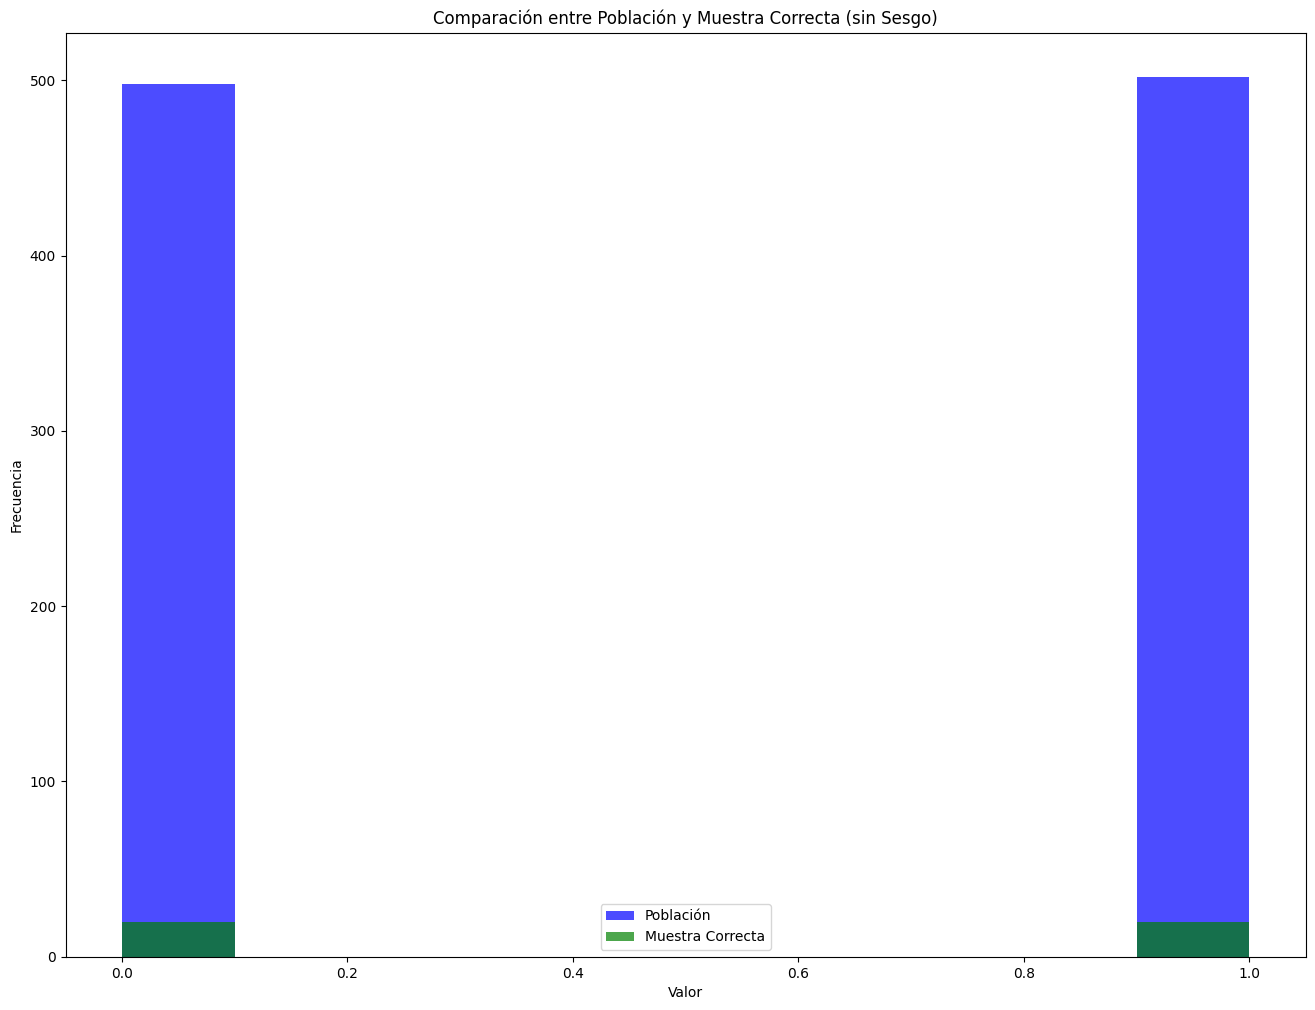

In [ ]:
muestra_grande = 40  # El tamaño a muestrear notar que NO CAMBIA
muestreo_incorrecto = np.random.choice(poblacion_uni, size=muestra_grande, replace=False) # Ahora, elijo al azar
plt.hist(poblacion_uni, color='blue', alpha=0.7, label='Población')
plt.hist(muestreo_incorrecto, color='green', alpha=0.7, label='Muestra Correcta')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Comparación entre Población y Muestra Correcta (sin Sesgo)')
plt.legend()
plt.show()

# Referencias



*   [Distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal)
*   [Numpy](https://numpy.org/doc/stable/index.html)
*   [Matplotlib](https://matplotlib.org/)

